Amazon Reviews

In [3]:
import nltk
import sklearn as skl
import pickle 
import os
import re
from xgboost import XGBClassifier
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_word=set(stopwords.words("english"))

EDA- Exploratory Data Analysis

In [8]:
dataset=pd.read_csv("amazon_alexa.tsv",delimiter="\t",quoting=3)
dataset.shape,dataset.head()

((3150, 5),
    rating       date         variation  \
 0       5  31-Jul-18  Charcoal Fabric    
 1       5  31-Jul-18  Charcoal Fabric    
 2       4  31-Jul-18    Walnut Finish    
 3       5  31-Jul-18  Charcoal Fabric    
 4       5  31-Jul-18  Charcoal Fabric    
 
                                     verified_reviews  feedback  
 0                                      Love my Echo!         1  
 1                                          Loved it!         1  
 2  "Sometimes while playing a game, you can answe...         1  
 3  "I have had a lot of fun with this thing. My 4...         1  
 4                                              Music         1  )

In [9]:
dataset.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [10]:
dataset[dataset["verified_reviews"].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.shape,dataset.head()

((3149, 5),
    rating       date         variation  \
 0       5  31-Jul-18  Charcoal Fabric    
 1       5  31-Jul-18  Charcoal Fabric    
 2       4  31-Jul-18    Walnut Finish    
 3       5  31-Jul-18  Charcoal Fabric    
 4       5  31-Jul-18  Charcoal Fabric    
 
                                     verified_reviews  feedback  
 0                                      Love my Echo!         1  
 1                                          Loved it!         1  
 2  "Sometimes while playing a game, you can answe...         1  
 3  "I have had a lot of fun with this thing. My 4...         1  
 4                                              Music         1  )

check length of reviews

In [13]:
dataset["length"]=dataset["verified_reviews"].apply(len)

In [14]:
dataset.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [15]:
dataset.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

Analyzing records

In [16]:
dataset["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

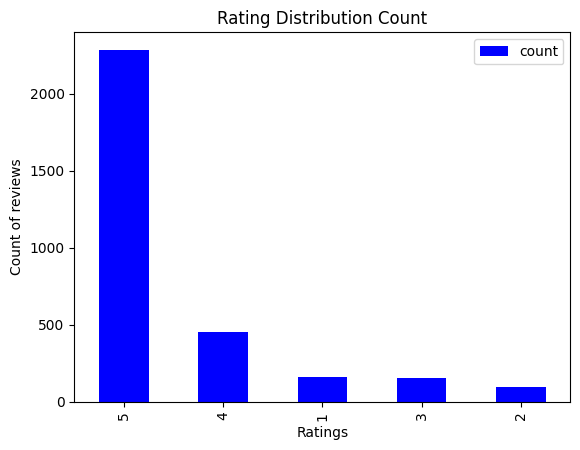

In [22]:
dataset["rating"].value_counts().plot.bar(color="b")
plt.legend()
plt.title("Rating Distribution Count")
plt.xlabel("Ratings")
plt.ylabel("Count of reviews")
plt.show()

Feedback Column analysis

In [23]:
dataset["feedback"].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

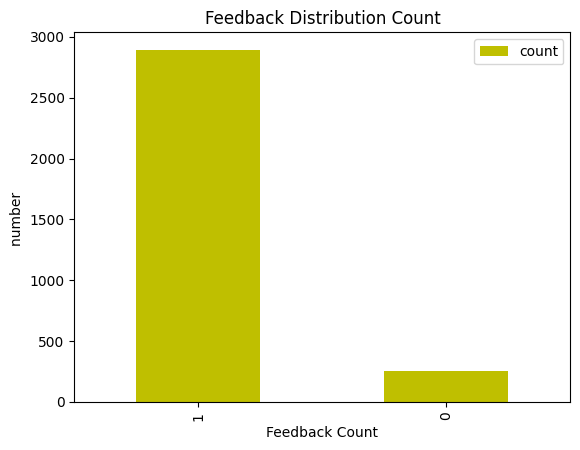

In [26]:
# 0=-ve 1,2
# 1=+ve 3,4,5
dataset["feedback"].value_counts().plot.bar(color="y")
plt.legend()
plt.title("Feedback Distribution Count")
plt.xlabel("Feedback Count")
plt.ylabel("number ")
plt.show()

Variation Column

In [28]:
dataset["variation"].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

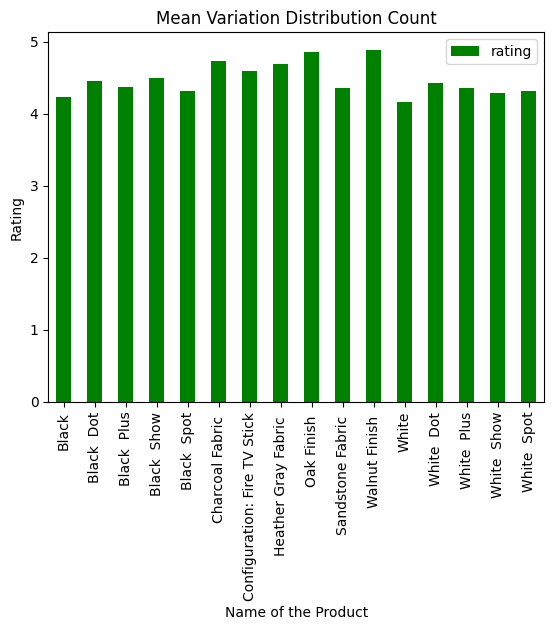

In [35]:
dataset.groupby("variation")["rating"].mean().plot.bar(color="g")
plt.legend()
plt.title("Mean Variation Distribution Count")
plt.xlabel("Name of the Product")
plt.ylabel("Rating")
plt.show()

In [39]:
count_vect=skl.feature_extraction.text.CountVectorizer(stop_words="english")
words=count_vect.fit_transform(dataset.verified_reviews)


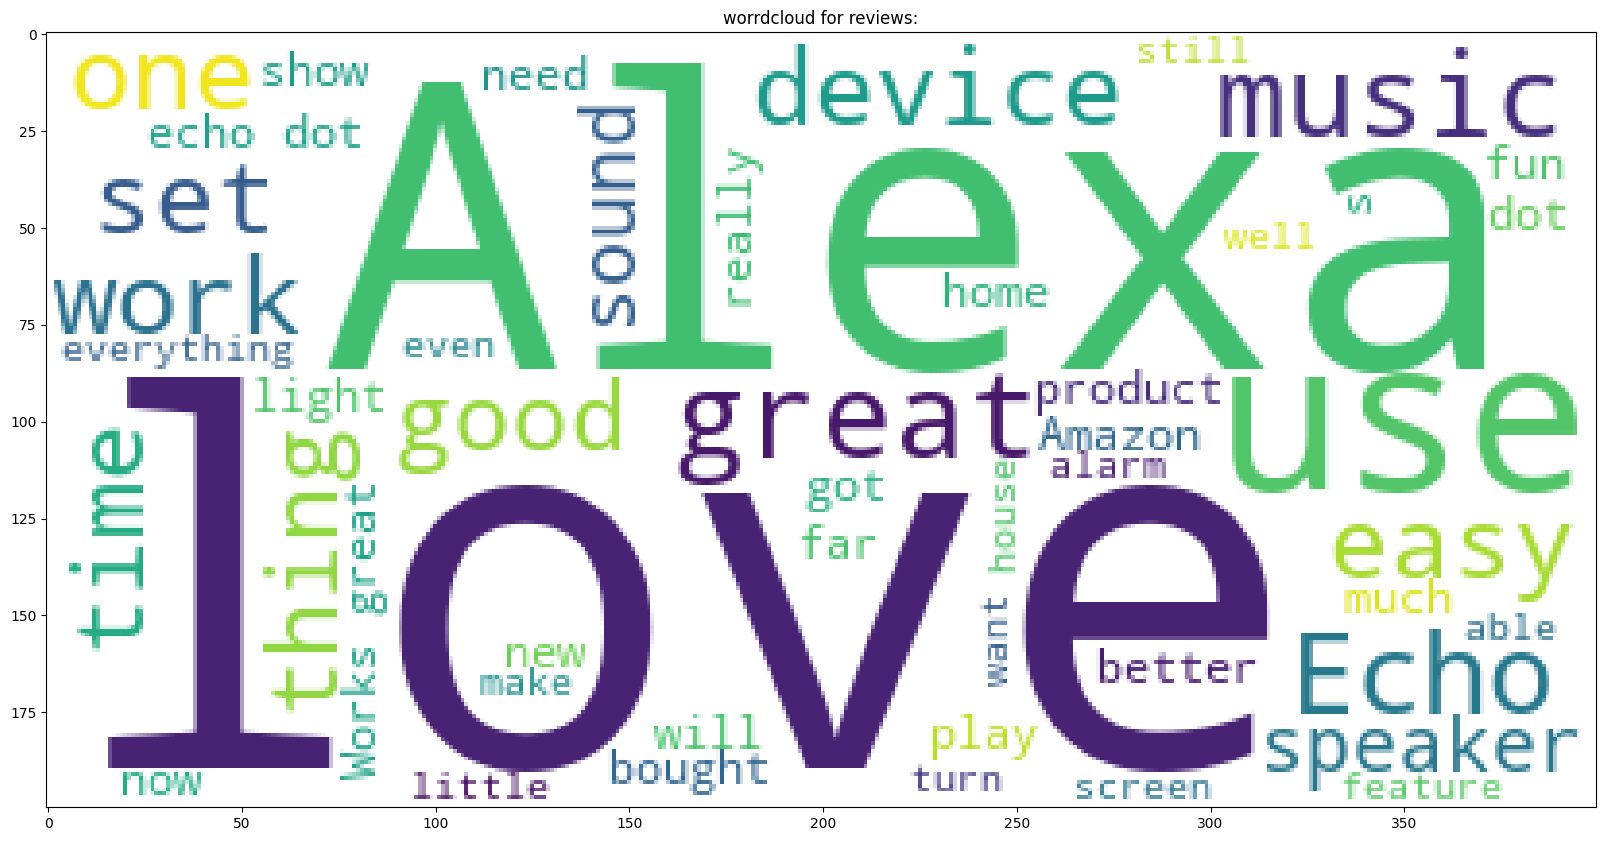

In [40]:
reviews=" ".join([review for review in dataset["verified_reviews"]])
word_cloud=WordCloud(background_color="white",max_words=50)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud.generate(reviews))
plt.title("worrdcloud for reviews:")
plt.show()

finding unique words

In [42]:
neg_reviews=" ".join([review for review in dataset[dataset["feedback"]==0]["verified_reviews"]])
neg_reviews=neg_reviews.lower().split()

poss_reviews=" ".join([review for review in dataset[dataset["feedback"]==1]["verified_reviews"]])
poss_reviews=poss_reviews.lower().split()


In [44]:
unique_neg=[x for x in neg_reviews if x not in poss_reviews ]
unique_neg=" ".join(unique_neg)
unique_neg

'siri, accurately deals." "stopped ,didn\'t commands!? working?" worthless. plug-in assumption sell rechargeable battery. boom flexibility lapsed, differentiate among speaks nobody her...not enter on.. unresponsive requests. select sending asap. refund 1. refunds both???!!! spoken promp stopped. refund poor "never techie dollar store. then." "initially, \'alexa\' foot echos/echo refurbished." performing often, nothing. fm reception live. horrible. native americans whose texas accent birth additionally reception poor marginal. extender ten difference. disconnected dust collectors. worked. broken. &#34;fixes&#34; accomplished connection. "&#34;never &#34; &#34;certified &#34; poor acknowledge indicated. perfectly.very !!!!" crashed crashed, over. orange freeze reboot freeze sentence. holding action buyer "now weary actively 3-4, concerning. release widespread firmware prevent have, "there fix. registered $39.99 (same ones), brand, spanking "two connection, all! worst fan...love brand...u

In [45]:
unique_poss=[x for x in poss_reviews if x not in neg_reviews ]
unique_poss=" ".join(unique_poss)
unique_poss

'echo! "sometimes game, home." yr learns dinosaurs, games categories. well." gift. accessible, do." "without cellphone, ipad alarm. r deaf, bedroom her.it random response. smartbon politics 5th purchased. room house. specifily controlling house. "love listened songs childhood! news, weather, information! great!" 85 dad, talks constantly." learning eveyday! figuring understand. laugh mother knee did.she enjoys do...alexa song, where, cook that!" "love, love, love!!" expected.... hates purchase. toy. household member! learn featues benefits 2nd improvement shorter greater fabric/color choices. ring top, plus/minus buttons. ring w comforting. :) standard usb charger /port round pin. alexa/echo/computer. like? :)" understands commands specific playlists songs spotify. lacking major programs. "we alexa! itunes, podcasts anypod, flash briefing morning. rely custom lists. volume. we\'re we\'ll uses.sometimes we\'re saying." "have days. size, stationed counter intrusive at." plays bedroom, imp

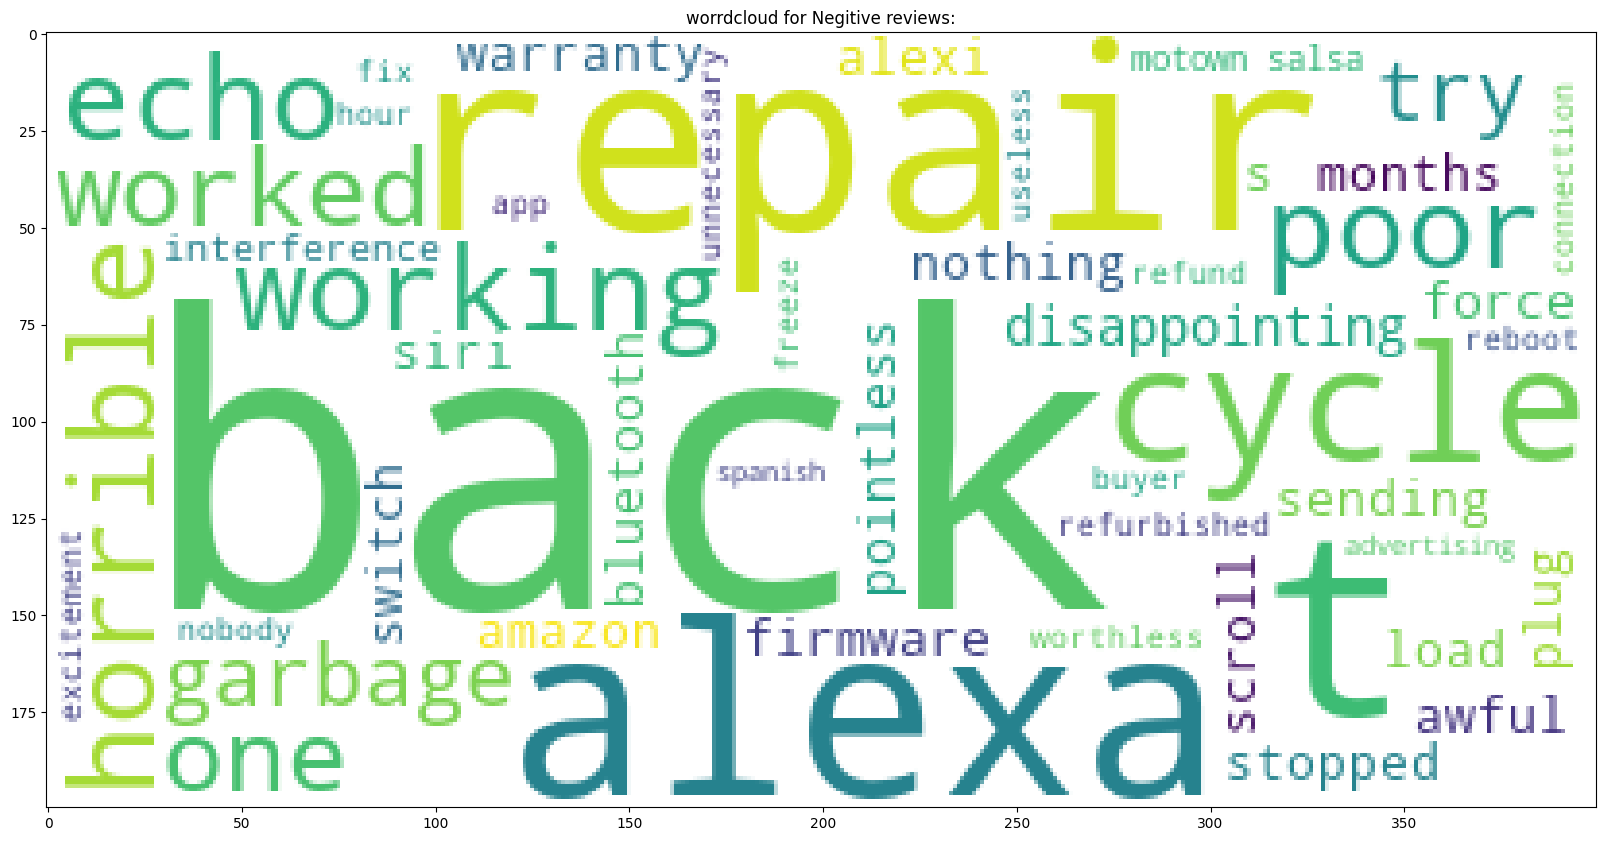

In [46]:
word_cloud=WordCloud(background_color="white",max_words=50)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud.generate(unique_neg))
plt.title("worrdcloud for Negitive reviews:")
plt.show()

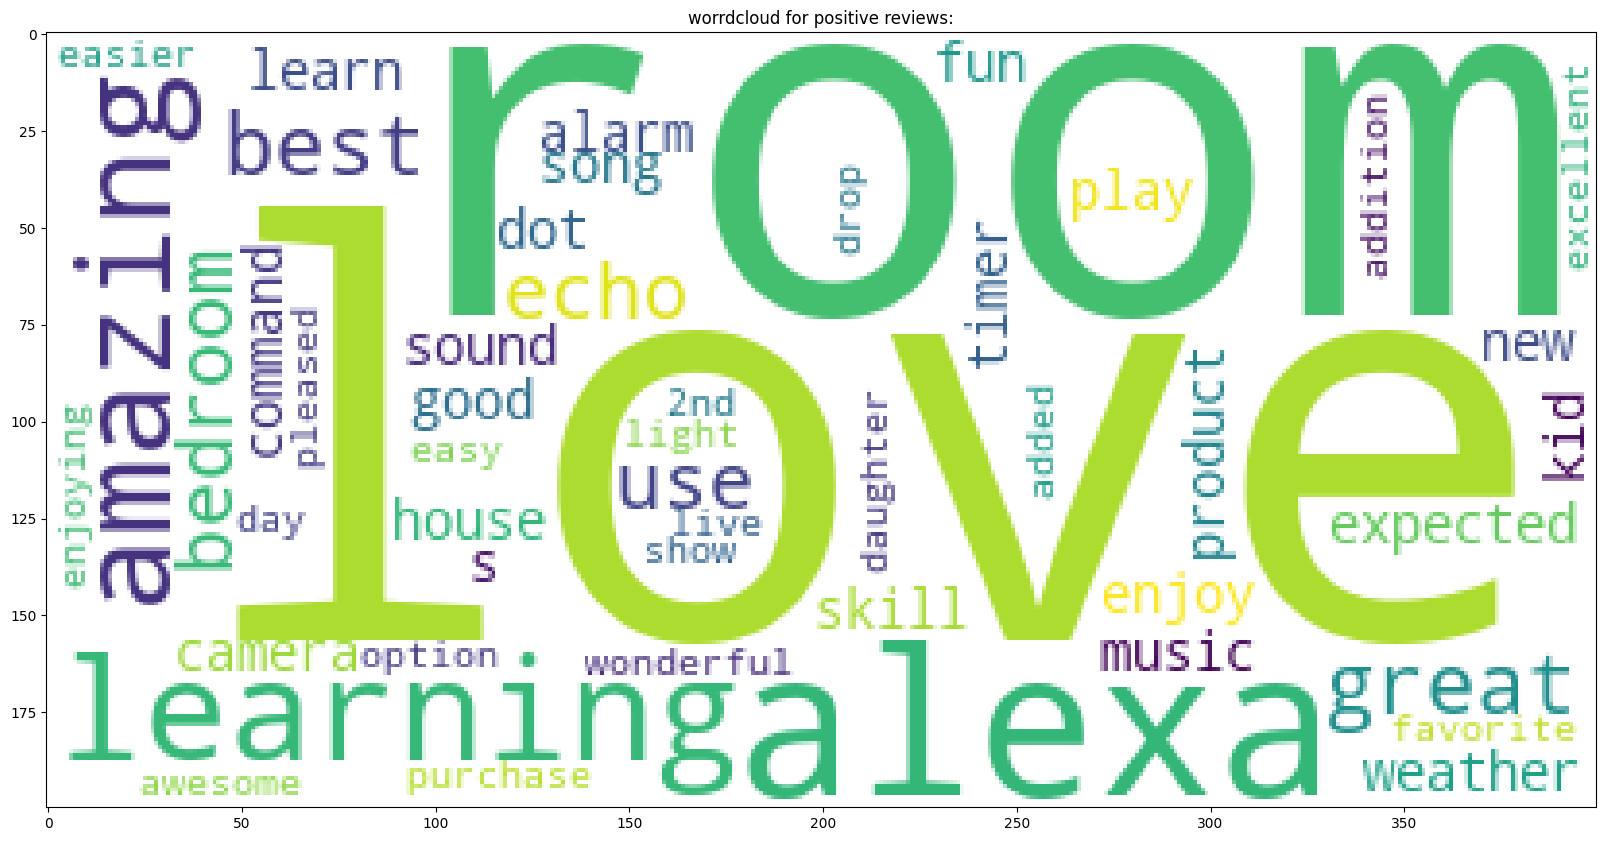

In [52]:
word_cloud=WordCloud(background_color="white",max_words=50)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud.generate(unique_poss))
plt.title("worrdcloud for positive reviews:")
plt.show()

Preprocessing And Modelling

In [53]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,dataset.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',dataset.iloc[i]["verified_reviews"])
    review=review.lower().split()
    review=[stemmer.stem(word) for word in review if not word in stop_word]
    review=' '.join(review)
    corpus.append(review)

Bag of Words Model

In [55]:
count_vect=CountVectorizer(max_features=2500)
X=count_vect.fit_transform(corpus).toarray()
y=dataset['feedback'].values

<IPython.core.display.Javascript object>

In [56]:
x_train,x_test,y_train,y_test=skl.model_selection.train_test_split(X,y,test_size=0.25)

In [57]:
x_test,x_test,y_train,y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [61]:
scaling=skl.preprocessing.MinMaxScaler()
x_train_scl=scaling.fit_transform(x_train)
x_test_scl=scaling.transform(x_test)

Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train_scl, y_train)

RandomForestClassifier()

In [70]:
rf_pred=rf_model.predict(x_test_scl)

In [71]:
cm=skl.metrics.confusion_matrix(y_test,rf_pred)


In [72]:
cm

array([[ 23,  44],
       [  2, 719]], dtype=int64)

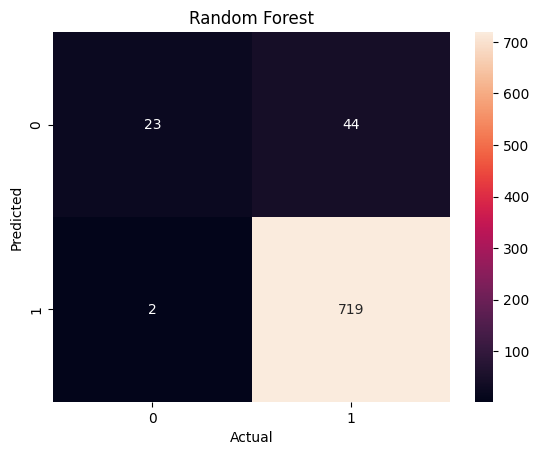

In [74]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")
plt.title("Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

XgBoost

In [75]:
xgb_model=XGBClassifier()
xgb_model.fit(x_train_scl,y_train)
y_preds = model_xgb.predict(X_test)
cm = skl.metrics.confusion_matrix(y_test, y_preds)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

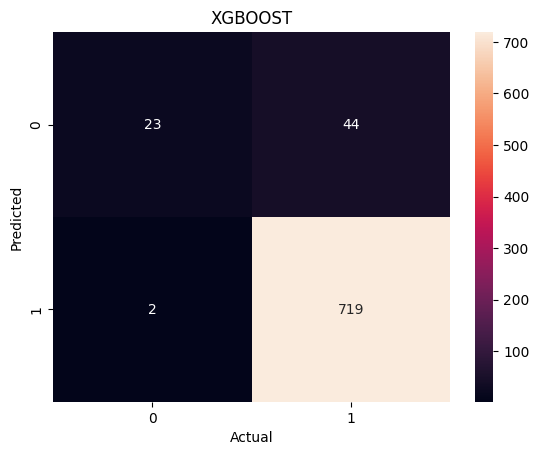

In [76]:
sns.heatmap(cm,annot=True,fmt="g")
plt.title("XGBOOST")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Decission Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train_scl,y_train)
y_pred=dt_model.predict(x_test_scl)
cm = skl.metrics.confusion_matrix(y_test, y_pred)



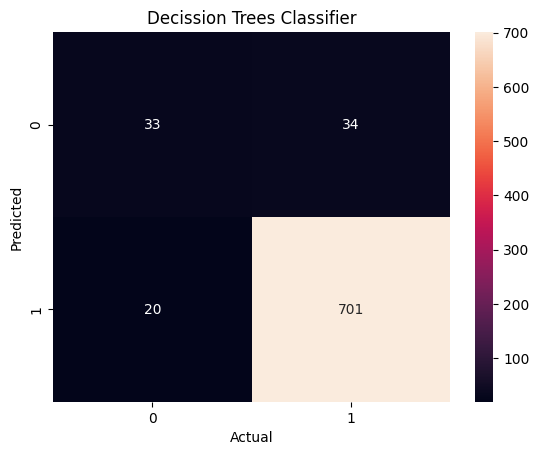

In [83]:
sns.heatmap(cm,annot=True,fmt="g")
plt.title("Decission Trees Classifier")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()